In [50]:
import pandas as pd
import numpy as np

df=pd.read_csv('cleaned_data.csv')
pd.DataFrame(df)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50317 entries, 0 to 50316
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   50317 non-null  object 
 1   age                           50317 non-null  int64  
 2   gender                        50317 non-null  object 
 3   region_category               50317 non-null  object 
 4   membership_category           50317 non-null  object 
 5   joining_date                  50317 non-null  object 
 6   joined_through_referral       50317 non-null  object 
 7   preferred_offer_types         50317 non-null  object 
 8   medium_of_operation           50317 non-null  object 
 9   internet_option               50317 non-null  object 
 10  days_since_last_login         50317 non-null  int64  
 11  avg_time_spent                50317 non-null  float64
 12  avg_transaction_value         50317 non-null  float64
 13  a

,customer_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,dataset
0,fffe4300490044003600300030003800,18,F,Village,Platinum Membership,2017-08-17,No,Gift Vouchers/Coupons,Unknown,Wi-Fi,...,230.228691,4.123106,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2.0,train
1,fffe4300490044003100390032003600,44,F,Town,No Membership,2016-11-11,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,...,145.006896,4.690416,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5.0,train
2,fffe43004900440036003000330031003600,37,M,City,No Membership,2016-10-29,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,...,158.869632,2.449490,567.66,No,Yes,Yes,Unsolved,Poor Website,5.0,train
3,fffe43004900440031003900350030003600,31,F,City,No Membership,2017-09-12,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,...,156.472554,4.000000,663.06,No,Yes,Yes,Solved,Poor Website,5.0,train
4,fffe43004900440036003300320035003300,13,M,City,Gold Membership,2016-01-08,No,Gift Vouchers/Coupons,Unknown,Wi-Fi,...,117.833654,4.898979,722.27,Yes,No,Yes,Unsolved,No reason specified,3.0,train


In [51]:
#drop_value='Unknown' for gender
df=df[df['gender']!= 'Unknown']

In [52]:
#drop_value='Unknown' for preferred offer types
df=df[df['preferred_offer_types']!= 'Unknown' ]


In [53]:
#making customer_id as unique row identifier index

if df['customer_id'].is_unique:

    df.set_index('customer_id', inplace=True)

    print("Successfully set 'customer_id' as index.")

else:

    print("Cannot set 'customer_id' as index, duplicates still present.")
 

Successfully set 'customer_id' as index.


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49844 entries, fffe4300490044003600300030003800 to fffe43004900440036003200340030003100
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           49844 non-null  int64  
 1   gender                        49844 non-null  object 
 2   region_category               49844 non-null  object 
 3   membership_category           49844 non-null  object 
 4   joining_date                  49844 non-null  object 
 5   joined_through_referral       49844 non-null  object 
 6   preferred_offer_types         49844 non-null  object 
 7   medium_of_operation           49844 non-null  object 
 8   internet_option               49844 non-null  object 
 9   days_since_last_login         49844 non-null  int64  
 10  avg_time_spent                49844 non-null  float64
 11  avg_transaction_value         49844 non-null  float64
 12  avg

In [55]:
#Gender-Binary label encoding 
df['gender'] = df['gender'].map({
    'M': 1,
    'F': 0,
})
df


,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,...,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,dataset
customer_id,,,,,,,,,,,,,,,,,,,,,
fffe4300490044003600300030003800,18,0,Village,Platinum Membership,2017-08-17,No,Gift Vouchers/Coupons,Unknown,Wi-Fi,17,...,230.228691,4.123106,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2.0,train
fffe4300490044003100390032003600,44,0,Town,No Membership,2016-11-11,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,14,...,145.006896,4.690416,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5.0,train
fffe43004900440036003000330031003600,37,1,City,No Membership,2016-10-29,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,11,...,158.869632,2.449490,567.66,No,Yes,Yes,Unsolved,Poor Website,5.0,train
fffe43004900440031003900350030003600,31,0,City,No Membership,2017-09-12,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,20,...,156.472554,4.000000,663.06,No,Yes,Yes,Solved,Poor Website,5.0,train
fffe43004900440036003300320035003300,13,1,City,Gold Membership,2016-01-08,No,Gift Vouchers/Coupons,Unknown,Wi-Fi,23,...,117.833654,4.898979,722.27,Yes,No,Yes,Unsolved,No reason specified,3.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffe43004900440035003600330037003800,12,1,Unknown,Gold Membership,2015-01-25,No,Without Offers,Desktop,Fiber_Optic,16,...,215.126358,4.242641,708.12,No,Yes,No,Not Applicable,Poor Product Quality,NaN,test
fffe43004900440032003900370037003100,40,0,Village,No Membership,2017-12-31,Yes,Without Offers,Desktop,Fiber_Optic,21,...,153.187010,0.000000,574.34,No,Yes,No,Not Applicable,No reason specified,NaN,test
fffe43004900440036003100310036003700,55,1,Town,No Membership,2015-09-09,No,Credit/Debit Card Offers,Desktop,Mobile_Data,18,...,133.804895,4.898979,564.30,No,Yes,Yes,Unsolved,No reason specified,NaN,test


In [56]:
#joined through referral - Binary encoding
df['joined_through_referral'] = df['joined_through_referral'].map({
    'Yes': 1,
    'No': 0,
})
df.head()

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,...,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,dataset
customer_id,,,,,,,,,,,,,,,,,,,,,
fffe4300490044003600300030003800,18,0,Village,Platinum Membership,2017-08-17,0,Gift Vouchers/Coupons,Unknown,Wi-Fi,17,...,230.228691,4.123106,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2.0,train
fffe4300490044003100390032003600,44,0,Town,No Membership,2016-11-11,1,Gift Vouchers/Coupons,Desktop,Wi-Fi,14,...,145.006896,4.690416,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5.0,train
fffe43004900440036003000330031003600,37,1,City,No Membership,2016-10-29,1,Gift Vouchers/Coupons,Desktop,Mobile_Data,11,...,158.869632,2.449490,567.66,No,Yes,Yes,Unsolved,Poor Website,5.0,train
fffe43004900440031003900350030003600,31,0,City,No Membership,2017-09-12,0,Credit/Debit Card Offers,Smartphone,Mobile_Data,20,...,156.472554,4.000000,663.06,No,Yes,Yes,Solved,Poor Website,5.0,train
fffe43004900440036003300320035003300,13,1,City,Gold Membership,2016-01-08,0,Gift Vouchers/Coupons,Unknown,Wi-Fi,23,...,117.833654,4.898979,722.27,Yes,No,Yes,Unsolved,No reason specified,3.0,train


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49844 entries, fffe4300490044003600300030003800 to fffe43004900440036003200340030003100
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           49844 non-null  int64  
 1   gender                        49844 non-null  int64  
 2   region_category               49844 non-null  object 
 3   membership_category           49844 non-null  object 
 4   joining_date                  49844 non-null  object 
 5   joined_through_referral       49844 non-null  int64  
 6   preferred_offer_types         49844 non-null  object 
 7   medium_of_operation           49844 non-null  object 
 8   internet_option               49844 non-null  object 
 9   days_since_last_login         49844 non-null  int64  
 10  avg_time_spent                49844 non-null  float64
 11  avg_transaction_value         49844 non-null  float64
 12  avg

In [58]:
#region_category- one-hot encoding 

df=pd.get_dummies(df, columns=['region_category'])
df.head()


,age,gender,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,...,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,dataset,region_category_City,region_category_Town,region_category_Unknown,region_category_Village
customer_id,,,,,,,,,,,,,,,,,,,,,
fffe4300490044003600300030003800,18,0,Platinum Membership,2017-08-17,0,Gift Vouchers/Coupons,Unknown,Wi-Fi,17,17.338685,...,Yes,No,Not Applicable,Products always in Stock,2.0,train,False,False,False,True
fffe4300490044003100390032003600,44,0,No Membership,2016-11-11,1,Gift Vouchers/Coupons,Desktop,Wi-Fi,14,22.719155,...,Yes,Yes,Solved in Follow-up,Poor Website,5.0,train,False,True,False,False
fffe43004900440036003000330031003600,37,1,No Membership,2016-10-29,1,Gift Vouchers/Coupons,Desktop,Mobile_Data,11,7.298630,...,Yes,Yes,Unsolved,Poor Website,5.0,train,True,False,False,False
fffe43004900440031003900350030003600,31,0,No Membership,2017-09-12,0,Credit/Debit Card Offers,Smartphone,Mobile_Data,20,10.636259,...,Yes,Yes,Solved,Poor Website,5.0,train,True,False,False,False
fffe43004900440036003300320035003300,13,1,Gold Membership,2016-01-08,0,Gift Vouchers/Coupons,Unknown,Wi-Fi,23,20.823544,...,No,Yes,Unsolved,No reason specified,3.0,train,True,False,False,False


In [59]:
from sklearn.preprocessing import OrdinalEncoder

# Initialize the OrdinalEncoder with the specified order
encoder = OrdinalEncoder(categories=[['No Membership', 'Basic Membership','Silver Membership','Gold Membership','Platinum Membership','Premium Membership']])

# Apply the encoder and ensure the result is in integer format
df['membership_category_encoded'] = encoder.fit_transform(df[['membership_category']]).astype(int)

df.drop('membership_category', axis=1, inplace=True)

df.head()

,age,gender,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,...,past_complaint,complaint_status,feedback,churn_risk_score,dataset,region_category_City,region_category_Town,region_category_Unknown,region_category_Village,membership_category_encoded
customer_id,,,,,,,,,,,,,,,,,,,,,
fffe4300490044003600300030003800,18,0,2017-08-17,0,Gift Vouchers/Coupons,Unknown,Wi-Fi,17,17.338685,230.228691,...,No,Not Applicable,Products always in Stock,2.0,train,False,False,False,True,4
fffe4300490044003100390032003600,44,0,2016-11-11,1,Gift Vouchers/Coupons,Desktop,Wi-Fi,14,22.719155,145.006896,...,Yes,Solved in Follow-up,Poor Website,5.0,train,False,True,False,False,0
fffe43004900440036003000330031003600,37,1,2016-10-29,1,Gift Vouchers/Coupons,Desktop,Mobile_Data,11,7.298630,158.869632,...,Yes,Unsolved,Poor Website,5.0,train,True,False,False,False,0
fffe43004900440031003900350030003600,31,0,2017-09-12,0,Credit/Debit Card Offers,Smartphone,Mobile_Data,20,10.636259,156.472554,...,Yes,Solved,Poor Website,5.0,train,True,False,False,False,0
fffe43004900440036003300320035003300,13,1,2016-01-08,0,Gift Vouchers/Coupons,Unknown,Wi-Fi,23,20.823544,117.833654,...,Yes,Unsolved,No reason specified,3.0,train,True,False,False,False,3


In [60]:
#preferred_offer_types - one-hot encoding 

df=pd.get_dummies(df, columns=['preferred_offer_types'])
df.head()


,age,gender,joining_date,joined_through_referral,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,...,churn_risk_score,dataset,region_category_City,region_category_Town,region_category_Unknown,region_category_Village,membership_category_encoded,preferred_offer_types_Credit/Debit Card Offers,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers
customer_id,,,,,,,,,,,,,,,,,,,,,
fffe4300490044003600300030003800,18,0,2017-08-17,0,Unknown,Wi-Fi,17,17.338685,230.228691,4.123106,...,2.0,train,False,False,False,True,4,False,True,False
fffe4300490044003100390032003600,44,0,2016-11-11,1,Desktop,Wi-Fi,14,22.719155,145.006896,4.690416,...,5.0,train,False,True,False,False,0,False,True,False
fffe43004900440036003000330031003600,37,1,2016-10-29,1,Desktop,Mobile_Data,11,7.298630,158.869632,2.449490,...,5.0,train,True,False,False,False,0,False,True,False
fffe43004900440031003900350030003600,31,0,2017-09-12,0,Smartphone,Mobile_Data,20,10.636259,156.472554,4.000000,...,5.0,train,True,False,False,False,0,True,False,False
fffe43004900440036003300320035003300,13,1,2016-01-08,0,Unknown,Wi-Fi,23,20.823544,117.833654,4.898979,...,3.0,train,True,False,False,False,3,False,True,False


In [61]:
#medium_smartphone - one-hot encoding. Dropping 'both', 'unknown'


df['medium_smartphone'] = df['medium_of_operation'].map({
    'Smartphone': 1,
    'Desktop': 0,
    'Both': 1,
    'Unknown': 0
})

df['medium_desktop'] = df['medium_of_operation'].map({
    'Smartphone': 0,
    'Desktop': 1,
    'Both': 1,
    'Unknown': 0
})

df.drop('medium_of_operation', axis=1, inplace=True)
df.head()

,age,gender,joining_date,joined_through_referral,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,...,region_category_City,region_category_Town,region_category_Unknown,region_category_Village,membership_category_encoded,preferred_offer_types_Credit/Debit Card Offers,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers,medium_smartphone,medium_desktop
customer_id,,,,,,,,,,,,,,,,,,,,,
fffe4300490044003600300030003800,18,0,2017-08-17,0,Wi-Fi,17,17.338685,230.228691,4.123106,781.75,...,False,False,False,True,4,False,True,False,0,0
fffe4300490044003100390032003600,44,0,2016-11-11,1,Wi-Fi,14,22.719155,145.006896,4.690416,500.69,...,False,True,False,False,0,False,True,False,0,1
fffe43004900440036003000330031003600,37,1,2016-10-29,1,Mobile_Data,11,7.298630,158.869632,2.449490,567.66,...,True,False,False,False,0,False,True,False,0,1
fffe43004900440031003900350030003600,31,0,2017-09-12,0,Mobile_Data,20,10.636259,156.472554,4.000000,663.06,...,True,False,False,False,0,True,False,False,1,0
fffe43004900440036003300320035003300,13,1,2016-01-08,0,Wi-Fi,23,20.823544,117.833654,4.898979,722.27,...,True,False,False,False,3,False,True,False,0,0


In [62]:
#internet_option - one-hot encoding
df=pd.get_dummies(df, columns=['internet_option'])
df.head()

,age,gender,joining_date,joined_through_referral,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,...,region_category_Village,membership_category_encoded,preferred_offer_types_Credit/Debit Card Offers,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers,medium_smartphone,medium_desktop,internet_option_Fiber_Optic,internet_option_Mobile_Data,internet_option_Wi-Fi
customer_id,,,,,,,,,,,,,,,,,,,,,
fffe4300490044003600300030003800,18,0,2017-08-17,0,17,17.338685,230.228691,4.123106,781.75,Yes,...,True,4,False,True,False,0,0,False,False,True
fffe4300490044003100390032003600,44,0,2016-11-11,1,14,22.719155,145.006896,4.690416,500.69,No,...,False,0,False,True,False,0,1,False,False,True
fffe43004900440036003000330031003600,37,1,2016-10-29,1,11,7.298630,158.869632,2.449490,567.66,No,...,False,0,False,True,False,0,1,False,True,False
fffe43004900440031003900350030003600,31,0,2017-09-12,0,20,10.636259,156.472554,4.000000,663.06,No,...,False,0,True,False,False,1,0,False,True,False
fffe43004900440036003300320035003300,13,1,2016-01-08,0,23,20.823544,117.833654,4.898979,722.27,Yes,...,False,3,False,True,False,0,0,False,False,True


In [63]:
#used_special_discount - Binary encoding
df['used_special_discount'] = df['used_special_discount'].map({
    'Yes': 1,
    'No': 0,
})
df.head()

,age,gender,joining_date,joined_through_referral,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,...,region_category_Village,membership_category_encoded,preferred_offer_types_Credit/Debit Card Offers,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers,medium_smartphone,medium_desktop,internet_option_Fiber_Optic,internet_option_Mobile_Data,internet_option_Wi-Fi
customer_id,,,,,,,,,,,,,,,,,,,,,
fffe4300490044003600300030003800,18,0,2017-08-17,0,17,17.338685,230.228691,4.123106,781.75,1,...,True,4,False,True,False,0,0,False,False,True
fffe4300490044003100390032003600,44,0,2016-11-11,1,14,22.719155,145.006896,4.690416,500.69,0,...,False,0,False,True,False,0,1,False,False,True
fffe43004900440036003000330031003600,37,1,2016-10-29,1,11,7.298630,158.869632,2.449490,567.66,0,...,False,0,False,True,False,0,1,False,True,False
fffe43004900440031003900350030003600,31,0,2017-09-12,0,20,10.636259,156.472554,4.000000,663.06,0,...,False,0,True,False,False,1,0,False,True,False
fffe43004900440036003300320035003300,13,1,2016-01-08,0,23,20.823544,117.833654,4.898979,722.27,1,...,False,3,False,True,False,0,0,False,False,True


In [64]:
#offer_application_preference - Binary encoding
df['offer_application_preference'] = df['offer_application_preference'].map({
    'Yes': 1,
    'No': 0,
})
df.head()

,age,gender,joining_date,joined_through_referral,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,...,region_category_Village,membership_category_encoded,preferred_offer_types_Credit/Debit Card Offers,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers,medium_smartphone,medium_desktop,internet_option_Fiber_Optic,internet_option_Mobile_Data,internet_option_Wi-Fi
customer_id,,,,,,,,,,,,,,,,,,,,,
fffe4300490044003600300030003800,18,0,2017-08-17,0,17,17.338685,230.228691,4.123106,781.75,1,...,True,4,False,True,False,0,0,False,False,True
fffe4300490044003100390032003600,44,0,2016-11-11,1,14,22.719155,145.006896,4.690416,500.69,0,...,False,0,False,True,False,0,1,False,False,True
fffe43004900440036003000330031003600,37,1,2016-10-29,1,11,7.298630,158.869632,2.449490,567.66,0,...,False,0,False,True,False,0,1,False,True,False
fffe43004900440031003900350030003600,31,0,2017-09-12,0,20,10.636259,156.472554,4.000000,663.06,0,...,False,0,True,False,False,1,0,False,True,False
fffe43004900440036003300320035003300,13,1,2016-01-08,0,23,20.823544,117.833654,4.898979,722.27,1,...,False,3,False,True,False,0,0,False,False,True


In [65]:
#dropping column - past_complaint
df.drop('past_complaint', axis=1, inplace=True)
df.head()

,age,gender,joining_date,joined_through_referral,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,...,region_category_Village,membership_category_encoded,preferred_offer_types_Credit/Debit Card Offers,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers,medium_smartphone,medium_desktop,internet_option_Fiber_Optic,internet_option_Mobile_Data,internet_option_Wi-Fi
customer_id,,,,,,,,,,,,,,,,,,,,,
fffe4300490044003600300030003800,18,0,2017-08-17,0,17,17.338685,230.228691,4.123106,781.75,1,...,True,4,False,True,False,0,0,False,False,True
fffe4300490044003100390032003600,44,0,2016-11-11,1,14,22.719155,145.006896,4.690416,500.69,0,...,False,0,False,True,False,0,1,False,False,True
fffe43004900440036003000330031003600,37,1,2016-10-29,1,11,7.298630,158.869632,2.449490,567.66,0,...,False,0,False,True,False,0,1,False,True,False
fffe43004900440031003900350030003600,31,0,2017-09-12,0,20,10.636259,156.472554,4.000000,663.06,0,...,False,0,True,False,False,1,0,False,True,False
fffe43004900440036003300320035003300,13,1,2016-01-08,0,23,20.823544,117.833654,4.898979,722.27,1,...,False,3,False,True,False,0,0,False,False,True


In [66]:
#doing one hot encoding for complaint_status
df=pd.get_dummies(df, columns=['complaint_status'])
df.head()

,age,gender,joining_date,joined_through_referral,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,...,medium_smartphone,medium_desktop,internet_option_Fiber_Optic,internet_option_Mobile_Data,internet_option_Wi-Fi,complaint_status_No Information Available,complaint_status_Not Applicable,complaint_status_Solved,complaint_status_Solved in Follow-up,complaint_status_Unsolved
customer_id,,,,,,,,,,,,,,,,,,,,,
fffe4300490044003600300030003800,18,0,2017-08-17,0,17,17.338685,230.228691,4.123106,781.75,1,...,0,0,False,False,True,False,True,False,False,False
fffe4300490044003100390032003600,44,0,2016-11-11,1,14,22.719155,145.006896,4.690416,500.69,0,...,0,1,False,False,True,False,False,False,True,False
fffe43004900440036003000330031003600,37,1,2016-10-29,1,11,7.298630,158.869632,2.449490,567.66,0,...,0,1,False,True,False,False,False,False,False,True
fffe43004900440031003900350030003600,31,0,2017-09-12,0,20,10.636259,156.472554,4.000000,663.06,0,...,1,0,False,True,False,False,False,True,False,False
fffe43004900440036003300320035003300,13,1,2016-01-08,0,23,20.823544,117.833654,4.898979,722.27,1,...,0,0,False,False,True,False,False,False,False,True


In [67]:
#Doing label encoding for feedback column
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'feedback' column
df['feedback'] = label_encoder.fit_transform(df['feedback'])
df.head()

,age,gender,joining_date,joined_through_referral,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,...,medium_smartphone,medium_desktop,internet_option_Fiber_Optic,internet_option_Mobile_Data,internet_option_Wi-Fi,complaint_status_No Information Available,complaint_status_Not Applicable,complaint_status_Solved,complaint_status_Solved in Follow-up,complaint_status_Unsolved
customer_id,,,,,,,,,,,,,,,,,,,,,
fffe4300490044003600300030003800,18,0,2017-08-17,0,17,17.338685,230.228691,4.123106,781.75,1,...,0,0,False,False,True,False,True,False,False,False
fffe4300490044003100390032003600,44,0,2016-11-11,1,14,22.719155,145.006896,4.690416,500.69,0,...,0,1,False,False,True,False,False,False,True,False
fffe43004900440036003000330031003600,37,1,2016-10-29,1,11,7.298630,158.869632,2.449490,567.66,0,...,0,1,False,True,False,False,False,False,False,True
fffe43004900440031003900350030003600,31,0,2017-09-12,0,20,10.636259,156.472554,4.000000,663.06,0,...,1,0,False,True,False,False,False,True,False,False
fffe43004900440036003300320035003300,13,1,2016-01-08,0,23,20.823544,117.833654,4.898979,722.27,1,...,0,0,False,False,True,False,False,False,False,True


In [68]:
df['feedback'].head()

customer_id
fffe4300490044003600300030003800        4
fffe4300490044003100390032003600        3
fffe43004900440036003000330031003600    3
fffe43004900440031003900350030003600    3
fffe43004900440036003300320035003300    0
Name: feedback, dtype: int32

In [69]:
# Get the mapping of labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print(label_mapping)


{'No reason specified': 0, 'Poor Customer Service': 1, 'Poor Product Quality': 2, 'Poor Website': 3, 'Products always in Stock': 4, 'Quality Customer Care': 5, 'Reasonable Price': 6, 'Too many ads': 7, 'User Friendly Website': 8}


In [70]:
columns_for_correlation = ['churn_risk_score', 'points_in_wallet', 'membership_category_encoded', 'gender','feedback','medium_smartphone','medium_desktop','preferred_offer_types_Credit/Debit Card Offers','preferred_offer_types_Gift Vouchers/Coupons','preferred_offer_types_Without Offers']

# Compute the correlation matrix
correlation_matrix = df[columns_for_correlation].corr()

# Display correlation of churn_risk_score with other columns
churn_risk_corr = correlation_matrix['churn_risk_score']

print(churn_risk_corr)

churn_risk_score                                  1.000000
points_in_wallet                                 -0.284976
membership_category_encoded                      -0.655426
gender                                            0.002554
feedback                                         -0.287484
medium_smartphone                                 0.014363
medium_desktop                                   -0.034413
preferred_offer_types_Credit/Debit Card Offers   -0.006444
preferred_offer_types_Gift Vouchers/Coupons      -0.047956
preferred_offer_types_Without Offers              0.054684
Name: churn_risk_score, dtype: float64


In [71]:
columns_for_correlation = ['churn_risk_score', 'avg_transaction_value', 'avg_time_spent', 'avg_frequency_login_days']

# Compute the correlation matrix
correlation_matrix = df[columns_for_correlation].corr()

# Display correlation of churn_risk_score with the selected columns
churn_risk_corr = correlation_matrix['churn_risk_score']

print(churn_risk_corr)

churn_risk_score            1.000000
avg_transaction_value      -0.251247
avg_time_spent             -0.029885
avg_frequency_login_days    0.131015
Name: churn_risk_score, dtype: float64


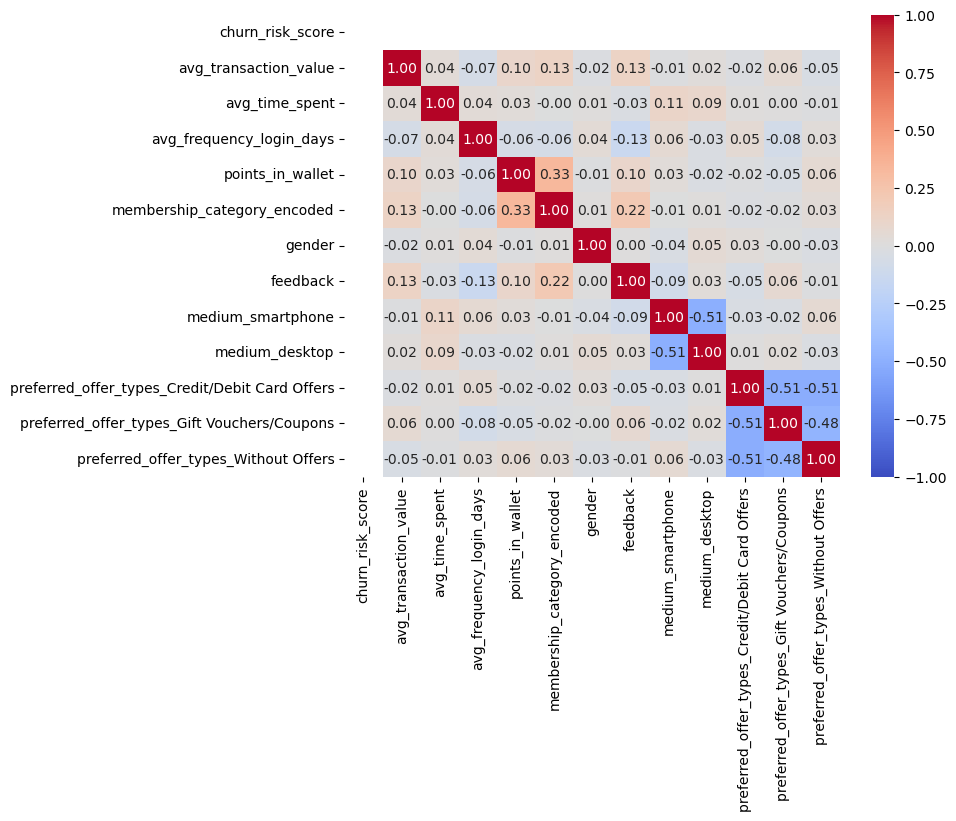

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

df_filtered = df[df['churn_risk_score'] == 0]

# Select the relevant columns for correlation
columns_for_correlation = ['churn_risk_score','avg_transaction_value', 'avg_time_spent', 'avg_frequency_login_days','points_in_wallet', 'membership_category_encoded', 'gender','feedback','medium_smartphone','medium_desktop','preferred_offer_types_Credit/Debit Card Offers','preferred_offer_types_Gift Vouchers/Coupons','preferred_offer_types_Without Offers']

# Compute the correlation matrix for the filtered data
correlation_matrix = df_filtered[columns_for_correlation].corr()

# Print the correlation matrix
#print(correlation_matrix)
plt.figure(figsize=(8, 6))  # Set figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.show()

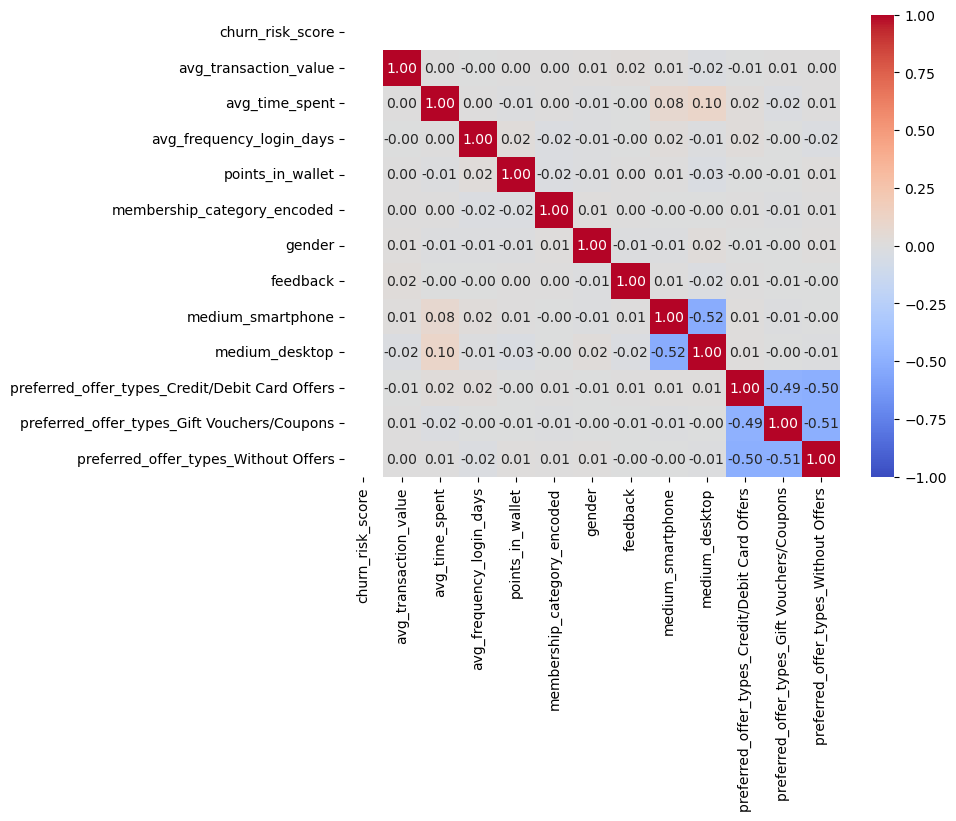

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

df_filtered = df[df['churn_risk_score'] == 3]

# Select the relevant columns for correlation
columns_for_correlation = ['churn_risk_score','avg_transaction_value', 'avg_time_spent', 'avg_frequency_login_days','points_in_wallet', 'membership_category_encoded', 'gender','feedback','medium_smartphone','medium_desktop','preferred_offer_types_Credit/Debit Card Offers','preferred_offer_types_Gift Vouchers/Coupons','preferred_offer_types_Without Offers']

# Compute the correlation matrix for the filtered data
correlation_matrix = df_filtered[columns_for_correlation].corr()

# Print the correlation matrix
#print(correlation_matrix)
plt.figure(figsize=(8, 6))  # Set figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.show()

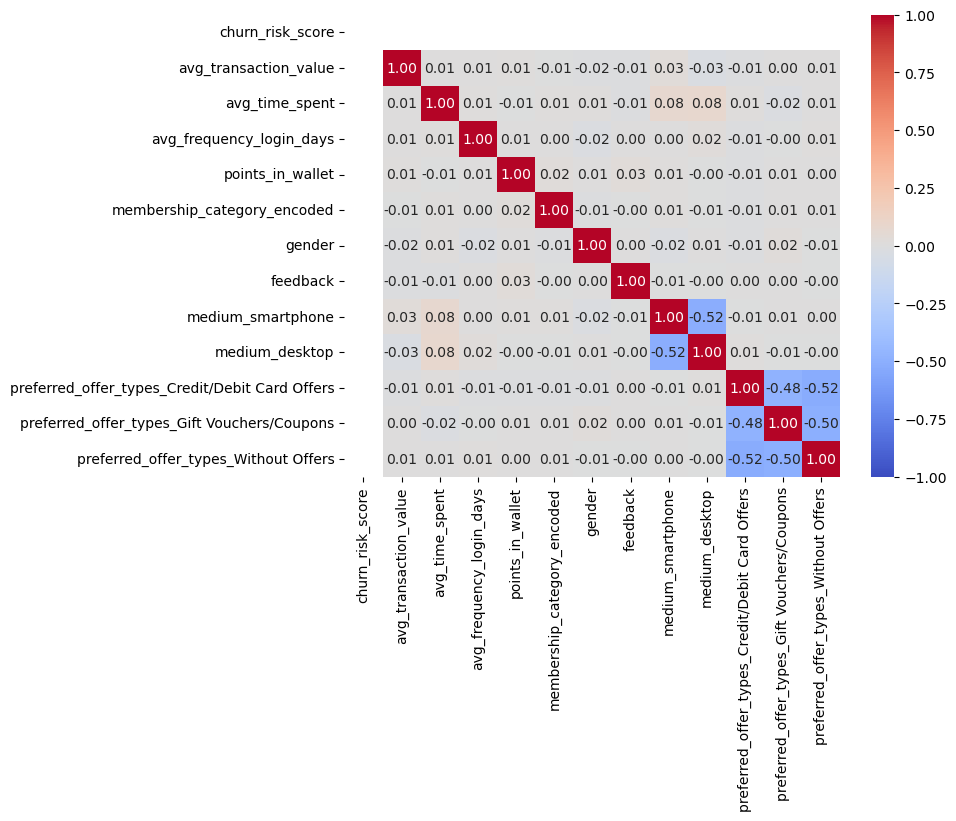

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

df_filtered = df[df['churn_risk_score'] == 4]

# Select the relevant columns for correlation
columns_for_correlation = ['churn_risk_score','avg_transaction_value', 'avg_time_spent', 'avg_frequency_login_days','points_in_wallet', 'membership_category_encoded', 'gender','feedback','medium_smartphone','medium_desktop','preferred_offer_types_Credit/Debit Card Offers','preferred_offer_types_Gift Vouchers/Coupons','preferred_offer_types_Without Offers']

# Compute the correlation matrix for the filtered data
correlation_matrix = df_filtered[columns_for_correlation].corr()

# Print the correlation matrix
#print(correlation_matrix)
plt.figure(figsize=(8, 6))  # Set figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.show()

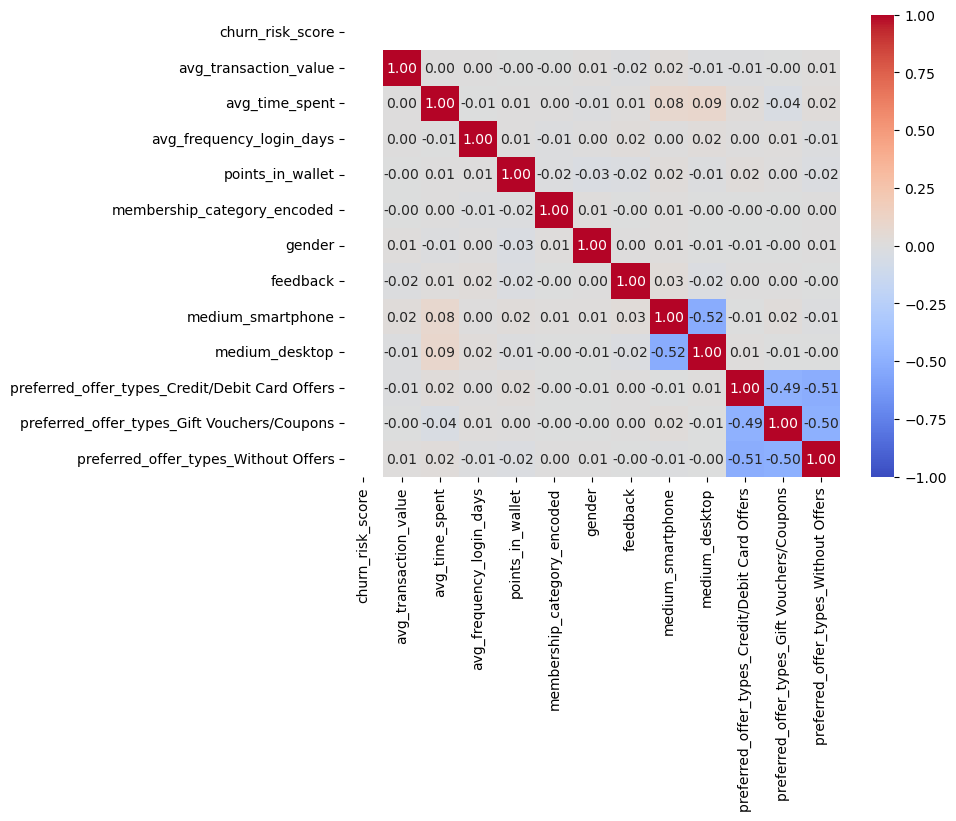

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

df_filtered = df[df['churn_risk_score'] == 5]

# Select the relevant columns for correlation
columns_for_correlation = ['churn_risk_score','avg_transaction_value', 'avg_time_spent', 'avg_frequency_login_days','points_in_wallet', 'membership_category_encoded', 'gender','feedback','medium_smartphone','medium_desktop','preferred_offer_types_Credit/Debit Card Offers','preferred_offer_types_Gift Vouchers/Coupons','preferred_offer_types_Without Offers']

# Compute the correlation matrix for the filtered data
correlation_matrix = df_filtered[columns_for_correlation].corr()

# Print the correlation matrix
#print(correlation_matrix)
plt.figure(figsize=(8, 6))  # Set figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.show()

In [76]:
# Drop rows where churn_risk_score is 0 and feedback is in [4, 5, 6, 8]
df_new = df[~((df['churn_risk_score'] == 0) & (df['feedback'].isin([4, 5, 6, 8])))]
df_new[df_new['churn_risk_score']==0][['churn_risk_score','feedback']]
df=df_new

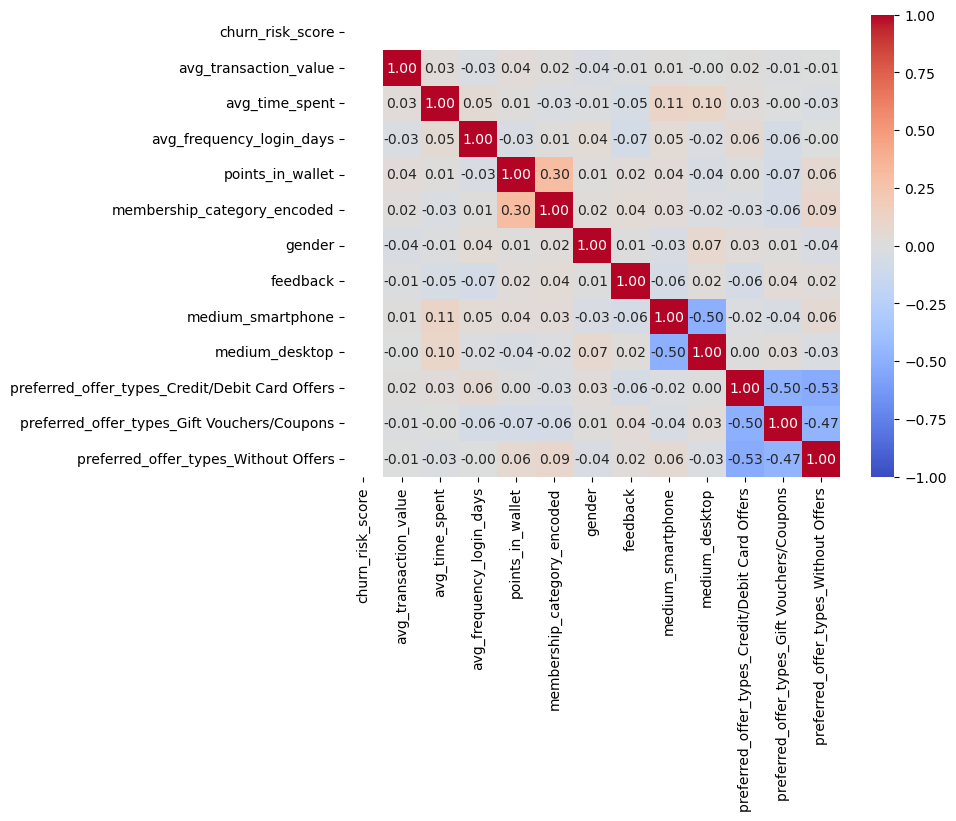

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

df_filtered = df[df['churn_risk_score'] == 0]

# Select the relevant columns for correlation
columns_for_correlation = ['churn_risk_score','avg_transaction_value', 'avg_time_spent', 'avg_frequency_login_days','points_in_wallet', 'membership_category_encoded', 'gender','feedback','medium_smartphone','medium_desktop','preferred_offer_types_Credit/Debit Card Offers','preferred_offer_types_Gift Vouchers/Coupons','preferred_offer_types_Without Offers']

# Compute the correlation matrix for the filtered data
correlation_matrix = df_filtered[columns_for_correlation].corr()

# Print the correlation matrix
#print(correlation_matrix)
plt.figure(figsize=(8, 6))  # Set figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.show()

In [78]:
# Safely apply the mapping
new_values = df['churn_risk_score'].map({
    0: 3,
    1: 1,
    2: 2,
    3: 4,
    4: 5,
    5: 6
})

# Update the DataFrame, ensuring original values remain for non-mapped entries
df['churn_risk_score'] = new_values.where(new_values.notna(), df['churn_risk_score'])


In [79]:
# Filter and print rows where churn_risk_score is 3
df[df['churn_risk_score'] == 3]['churn_risk_score']


customer_id
fffe43004900440032003300320035003700    3.0
fffe43004900440031003700370031003300    3.0
fffe43004900440033003600300039003900    3.0
fffe43004900440031003400380035003700    3.0
fffe43004900440033003300360030003500    3.0
                                       ... 
fffe43004900440032003100370038003400    3.0
fffe43004900440031003100390035003300    3.0
fffe43004900440031003400310034003100    3.0
fffe4300490044003100300037003400        3.0
fffe43004900440032003200370033003800    3.0
Name: churn_risk_score, Length: 882, dtype: float64

In [80]:
df

,age,gender,joining_date,joined_through_referral,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,...,medium_smartphone,medium_desktop,internet_option_Fiber_Optic,internet_option_Mobile_Data,internet_option_Wi-Fi,complaint_status_No Information Available,complaint_status_Not Applicable,complaint_status_Solved,complaint_status_Solved in Follow-up,complaint_status_Unsolved
customer_id,,,,,,,,,,,,,,,,,,,,,
fffe4300490044003600300030003800,18,0,2017-08-17,0,17,17.338685,230.228691,4.123106,781.75,1,...,0,0,False,False,True,False,True,False,False,False
fffe4300490044003100390032003600,44,0,2016-11-11,1,14,22.719155,145.006896,4.690416,500.69,0,...,0,1,False,False,True,False,False,False,True,False
fffe43004900440036003000330031003600,37,1,2016-10-29,1,11,7.298630,158.869632,2.449490,567.66,0,...,0,1,False,True,False,False,False,False,False,True
fffe43004900440031003900350030003600,31,0,2017-09-12,0,20,10.636259,156.472554,4.000000,663.06,0,...,1,0,False,True,False,False,False,True,False,False
fffe43004900440036003300320035003300,13,1,2016-01-08,0,23,20.823544,117.833654,4.898979,722.27,1,...,0,0,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffe43004900440035003600330037003800,12,1,2015-01-25,0,16,10.176935,215.126358,4.242641,708.12,0,...,0,1,True,False,False,False,True,False,False,False
fffe43004900440032003900370037003100,40,0,2017-12-31,1,21,7.949214,153.187010,0.000000,574.34,0,...,0,1,True,False,False,False,True,False,False,False
fffe43004900440036003100310036003700,55,1,2015-09-09,0,18,8.289753,133.804895,4.898979,564.30,0,...,0,1,False,True,False,False,False,False,False,True


# Numerical Tranformations

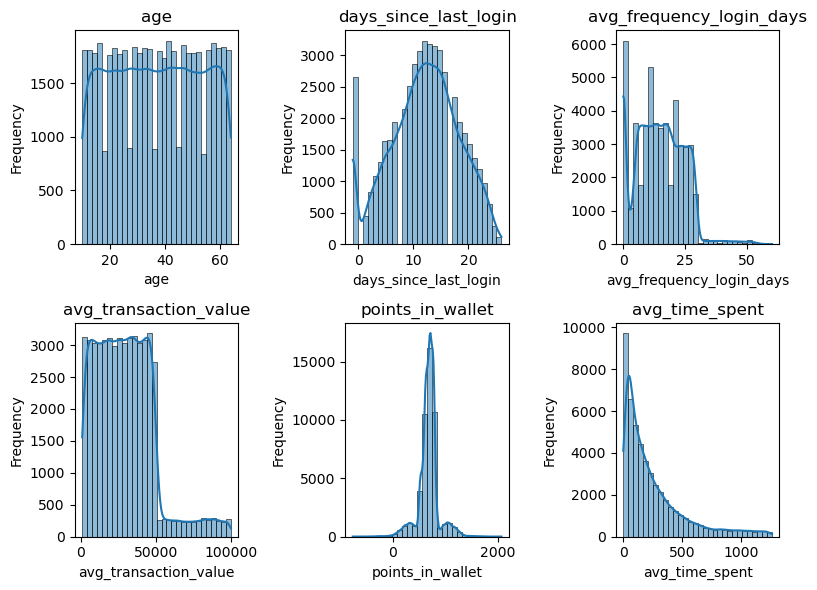

In [81]:
#age is already evenly distributed
#days_since_last_login will be changed if necessary after checking the accurcy of model 
#points_in_wallet
import numpy as np

# Reverse square root transformation by squaring the values in each column
df['avg_time_spent'] = df['avg_time_spent'] ** 2
df['avg_transaction_value'] = df['avg_transaction_value'] ** 2
df['avg_frequency_login_days'] = df['avg_frequency_login_days'] ** 2

numerical_columns = [
    'age', 
    'days_since_last_login', 
    'avg_frequency_login_days', 
    'avg_transaction_value', 
    'points_in_wallet', 
    'avg_time_spent'
]


plt.figure(figsize=(8, 6))
for i, column in enumerate(numerical_columns):
    plt.subplot(2, 3, i + 1) 
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'{column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



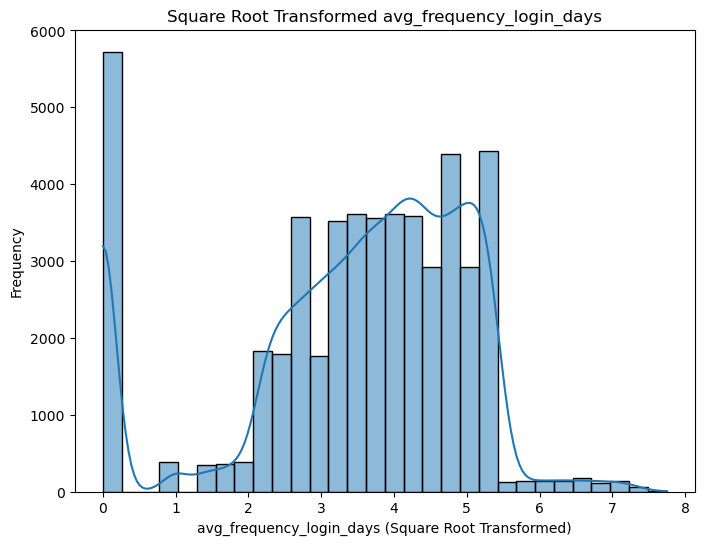

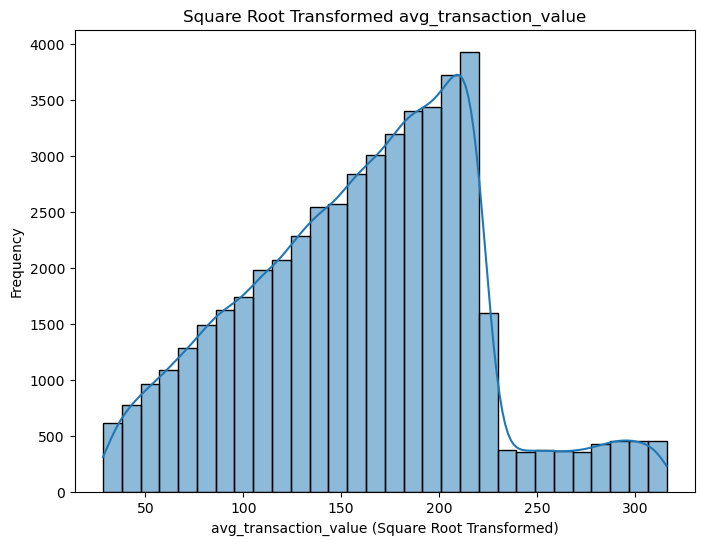

In [82]:
columns_to_sqrt_transform = ['avg_frequency_login_days', 'avg_transaction_value']

# Apply square root transformation
df[columns_to_sqrt_transform] = df[columns_to_sqrt_transform].apply(lambda x: np.sqrt(x))

# Plot the histograms for the transformed data
for column in columns_to_sqrt_transform:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Square Root Transformed {column}')
    plt.xlabel(f'{column} (Square Root Transformed)')
    plt.ylabel('Frequency')
    plt.show()

We tried other transfrmmations for avg_frequency_login_days and avg_transaction_value columns and got the nearest curve for square root transformation

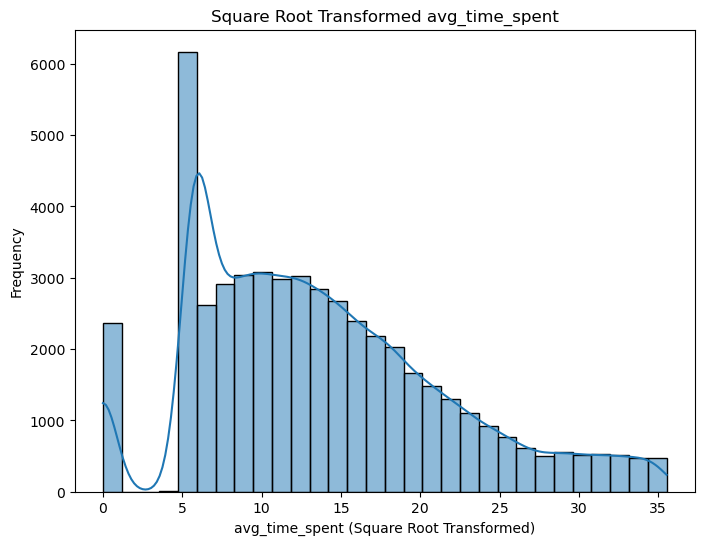

In [83]:
# Define the columns to apply square root transformation
columns_to_sqrt_transform = ['avg_time_spent']

# Apply square root transformation
df[columns_to_sqrt_transform] = df[columns_to_sqrt_transform].apply(lambda x: np.sqrt(x))

# Plot the histograms for the transformed data
for column in columns_to_sqrt_transform:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Square Root Transformed {column}')
    plt.xlabel(f'{column} (Square Root Transformed)')
    plt.ylabel('Frequency')
    plt.show()

In [84]:
df.columns

Index(['age', 'gender', 'joining_date', 'joined_through_referral',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'feedback', 'churn_risk_score',
       'dataset', 'region_category_City', 'region_category_Town',
       'region_category_Unknown', 'region_category_Village',
       'membership_category_encoded',
       'preferred_offer_types_Credit/Debit Card Offers',
       'preferred_offer_types_Gift Vouchers/Coupons',
       'preferred_offer_types_Without Offers', 'medium_smartphone',
       'medium_desktop', 'internet_option_Fiber_Optic',
       'internet_option_Mobile_Data', 'internet_option_Wi-Fi',
       'complaint_status_No Information Available',
       'complaint_status_Not Applicable', 'complaint_status_Solved',
       'complaint_status_Solved in Follow-up', 'complaint_status_Unsolved'],
      dtype='object')

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49709 entries, fffe4300490044003600300030003800 to fffe43004900440036003200340030003100
Data columns (total 32 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   age                                             49709 non-null  int64  
 1   gender                                          49709 non-null  int64  
 2   joining_date                                    49709 non-null  object 
 3   joined_through_referral                         49709 non-null  int64  
 4   days_since_last_login                           49709 non-null  int64  
 5   avg_time_spent                                  49709 non-null  float64
 6   avg_transaction_value                           49709 non-null  float64
 7   avg_frequency_login_days                        49709 non-null  float64
 8   points_in_wallet                                49709 non-n

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Select numerical columns to check for multicollinearity (you can update this based on your dataset)
columns_to_check = ['age', 'gender', 'joined_through_referral',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'feedback', 'region_category_City', 'region_category_Town',
       'region_category_Unknown', 'region_category_Village',
       'membership_category_encoded',
       'preferred_offer_types_Credit/Debit Card Offers',
       'preferred_offer_types_Gift Vouchers/Coupons',
       'preferred_offer_types_Without Offers', 'medium_smartphone',
       'medium_desktop', 'internet_option_Fiber_Optic',
       'internet_option_Mobile_Data', 'internet_option_Wi-Fi',
       'complaint_status_No Information Available',
       'complaint_status_Not Applicable', 'complaint_status_Solved',
       'complaint_status_Solved in Follow-up', 'complaint_status_Unsolved']

# Standardize the data to ensure all columns are on the same scale
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[columns_to_check])


In [87]:
df = df.drop(columns=['dataset'])

print(df.head())


                                      age  gender joining_date  \
customer_id                                                      
fffe4300490044003600300030003800       18       0   2017-08-17   
fffe4300490044003100390032003600       44       0   2016-11-11   
fffe43004900440036003000330031003600   37       1   2016-10-29   
fffe43004900440031003900350030003600   31       0   2017-09-12   
fffe43004900440036003300320035003300   13       1   2016-01-08   

                                      joined_through_referral  \
customer_id                                                     
fffe4300490044003600300030003800                            0   
fffe4300490044003100390032003600                            1   
fffe43004900440036003000330031003600                        1   
fffe43004900440031003900350030003600                        0   
fffe43004900440036003300320035003300                        0   

                                      days_since_last_login  avg_time_spent  \
cu

In [88]:
df = df.drop(columns=['joining_date'])

print(df.head())


                                      age  gender  joined_through_referral  \
customer_id                                                                  
fffe4300490044003600300030003800       18       0                        0   
fffe4300490044003100390032003600       44       0                        1   
fffe43004900440036003000330031003600   37       1                        1   
fffe43004900440031003900350030003600   31       0                        0   
fffe43004900440036003300320035003300   13       1                        0   

                                      days_since_last_login  avg_time_spent  \
customer_id                                                                   
fffe4300490044003600300030003800                         17       17.338685   
fffe4300490044003100390032003600                         14       22.719155   
fffe43004900440036003000330031003600                     11        7.298630   
fffe43004900440031003900350030003600                     2

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler


# Define features (X) and target (y)
df = df.dropna(subset=['churn_risk_score']) # consider only training dataset
X = df.drop('churn_risk_score', axis=1)
y = df['churn_risk_score']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 2: Apply Random Oversampling only to the training set
target_counts = {1.0: 6000, 2.0: 6000, 3.0: 6000}

ros = RandomOverSampler(sampling_strategy=target_counts, random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Convert the resampled data back to a DataFrame
train_set_resampled = pd.concat([pd.DataFrame(X_train_resampled, columns=X_train.columns), pd.Series(y_train_resampled, name='churn_risk_score')], axis=1)

In [90]:
pipeline = Pipeline(steps=[
    ('classifier', LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, class_weight='balanced'))
])

In [91]:
print(X_train.head())

                                      age  gender  joined_through_referral  \
customer_id                                                                  
fffe43004900440031003000390033003100   58       1                        0   
fffe43004900440031003700360037003900   39       1                        0   
fffe43004900440032003700330032003800   41       1                        0   
fffe43004900440031003800320032003900   15       1                        1   
fffe43004900440035003700360036003000   10       1                        1   

                                      days_since_last_login  avg_time_spent  \
customer_id                                                                   
fffe43004900440031003000390033003100                     20       17.238329   
fffe43004900440031003700360037003900                     -1       15.475788   
fffe43004900440032003700330032003800                     13       13.067134   
fffe43004900440031003800320032003900                     -

In [92]:

pipeline.fit(X_train, y_train)


C:\Users\nimesh.j\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    multi_class='multinomial'))])

In [93]:

# Make predictions
y_pred = pipeline.predict(X_test)

In [94]:

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.34      0.58      0.43       455
         2.0       0.27      0.38      0.32       494
         3.0       0.04      0.19      0.06       166
         4.0       0.70      0.53      0.60      1813
         5.0       0.37      0.20      0.26      1827
         6.0       0.63      0.67      0.65      1717

    accuracy                           0.45      6472
   macro avg       0.39      0.42      0.39      6472
weighted avg       0.51      0.45      0.47      6472

